In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import poisson
from scipy.stats import norm

###  1. MLE with Poisson Distribution

To understand how MLE can be used to estimate the parameter ($( \lambda $)) of a Poisson distribution using synthetic data.


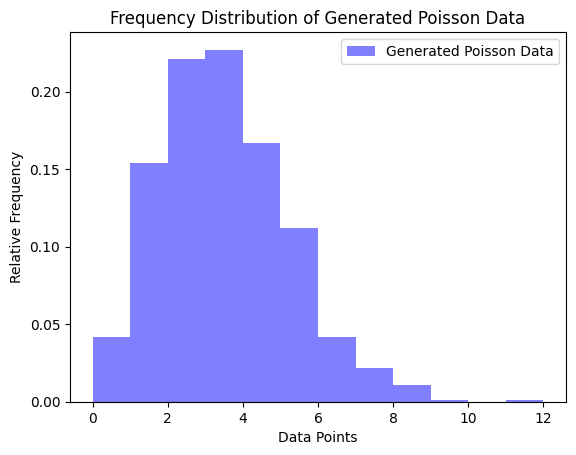

In [195]:
# Generate synthetic data: To generate synthetic data from a Poisson distribution with a known lambda (3) for demonstration.
np.random.seed(1)
true_lambda = 3
n_samples = 1000
data_poisson = np.random.poisson(true_lambda, n_samples)

# Visualize Synthetic Poisson Data
# Creating a histogram to offer an initial look at the data's distribution, aiding in understanding before applying MLE.
plt.hist(data_poisson, bins=range(min(data_poisson), max(data_poisson) + 1), density=True, alpha=0.5, color='b', label='Generated Poisson Data')
plt.title('Frequency Distribution of Generated Poisson Data')
plt.xlabel('Data Points')
plt.ylabel('Relative Frequency')
plt.legend()
plt.show()

In [196]:
# Define the negative log-likelihood function :To define the negative log-likelihood function that we aim to minimize. This function computes the likelihood of observing the data given a lambda.
def neg_log_likelihood_poisson(lam):
    return -np.sum(poisson.logpmf(data_poisson, lam))

In [203]:
# Perform MLE to estimate lambda: to find the lambda that minimizes the negative log-likelihood, effectively maximizing the likelihood.
initial_guess = [1]
result_poisson = minimize(neg_log_likelihood_poisson, initial_guess, method='L-BFGS-B', bounds=[(0.01, None)])
mle_lambda = result_poisson.x[0]
# Display the estimated lambda : To compare the true lambda with the lambda estimated using MLE.
print(f"True lambda: {true_lambda}, MLE estimated lambda: {mle_lambda}")


True lambda: 3, MLE estimated lambda: 3.020000197432692


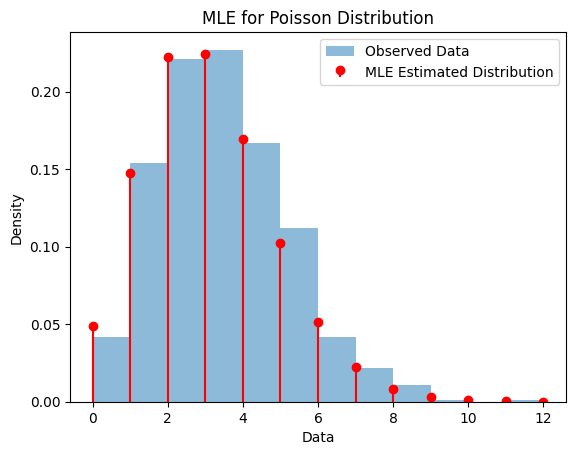

In [198]:
#  Plot the data and estimated distribution : To visualize how well the estimated Poisson distribution fits the synthetic data.
plt.hist(data_poisson, bins=range(0, max(data_poisson) + 1), density=True, alpha=0.5, label='Observed Data')
x_poisson = np.arange(0, max(data_poisson) + 1)
pmf_poisson = poisson.pmf(x_poisson, mle_lambda)
plt.stem(x_poisson, pmf_poisson, 'r', markerfmt='ro', basefmt=" ", linefmt='r', label='MLE Estimated Distribution')
plt.title('MLE for Poisson Distribution')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()



### 2. MLE with Gaussian Distribution
 To demonstrate how MLE can be used to estimate the parameters ($( \mu $) and $( \sigma $)) of a Gaussian distribution using synthetic data.


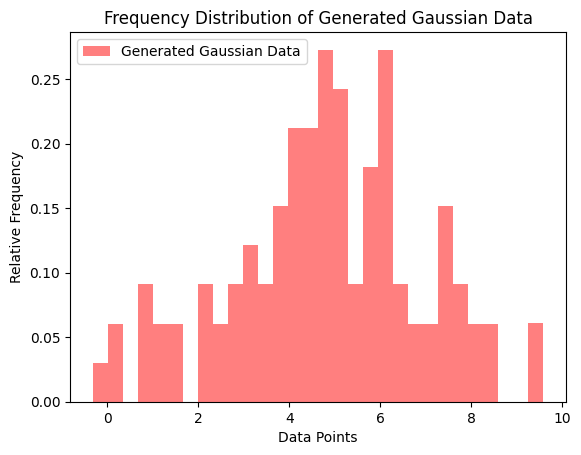

In [199]:
# Generating synthetic data points from a Gaussian distribution.
np.random.seed(2)
true_mu = 5
true_sigma = 2
n_samples = 100
data_gaussian = np.random.normal(true_mu, true_sigma, n_samples)

# Visualize Synthetic Gaussian Data
# Creating a histogram to offer an initial look at the data's distribution, aiding in understanding before applying MLE.
plt.hist(data_gaussian, bins=30, density=True, alpha=0.5, color='r', label='Generated Gaussian Data')
plt.title('Frequency Distribution of Generated Gaussian Data')
plt.xlabel('Data Points')
plt.ylabel('Relative Frequency')
plt.legend()
plt.show()


In [200]:
# Define the negative log-likelihood function for Gaussian. We aim to minimize this function to find the best parameters (mu,sigma).
def neg_log_likelihood_gaussian(params):
    mu, sigma = params
    return -np.sum(norm.logpdf(data_gaussian, mu, sigma))


In [201]:
# Perform MLE to estimate mu and sigma using optimization to find the parameters that minimize the negative log-likelihood.
initial_guess = [1, 1]
result_gaussian = minimize(neg_log_likelihood_gaussian, initial_guess, method='L-BFGS-B', bounds=[(None, None), (0.01, None)])
mle_mu, mle_sigma = result_gaussian.x

print(f"True mu: {true_mu}, MLE estimated mu: {mle_mu}")
print(f"True sigma: {true_sigma}, MLE estimated sigma: {mle_sigma}")


True mu: 5, MLE estimated mu: 4.792517661318108
True sigma: 2, MLE estimated sigma: 2.074071378404334


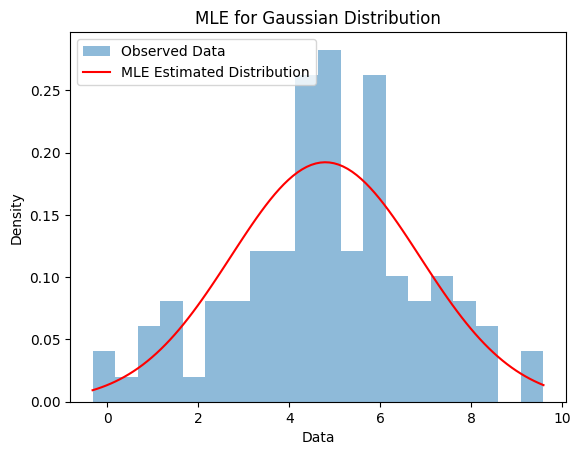

In [202]:
# Plotting the synthetic data and the Gaussian distribution estimated via MLE to visualize how well the MLE-estimated distribution fits the synthetic data.
plt.hist(data_gaussian, bins=20, density=True, alpha=0.5, label='Observed Data')
x_gaussian = np.linspace(min(data_gaussian), max(data_gaussian), 100)
pdf_gaussian = norm.pdf(x_gaussian, mle_mu, mle_sigma)
plt.plot(x_gaussian, pdf_gaussian, 'r', label='MLE Estimated Distribution')
plt.title('MLE for Gaussian Distribution')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()
